In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers import ZeroPadding2D

# Set working folder

In [ ]:
working_folder = "/content/drive/MyDrive/LeNet/"

In [ ]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshape data from (60_000, 28, 28) to (60_000, 32, 32) through zeor-padding
x_train = np.pad(x_train, ((0,0),(2,2),(2,2)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2)), 'constant')

In [ ]:
# Peforming reshaping operation for model input
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

# Normalization to have images pixels in [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Building the Model Architecture
model = Sequential()

# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 49s 101ms/step - loss: 0.3081 - accuracy: 0.9071 - val_loss: 0.0956 - val_accuracy: 0.9702
Epoch 2/20
469/469 [==============================] - 39s 83ms/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0531 - val_accuracy: 0.9832
Epoch 3/20
469/469 [==============================] - 36s 77ms/step - loss: 0.0546 - accuracy: 0.9838 - val_loss: 0.0459 - val_accuracy: 0.9841
Epoch 4/20
469/469 [==============================] - 38s 81ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 5/20
469/469 [==============================] - 36s 77ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 6/20
469/469 [==============================] - 37s 79ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0393 - val_accuracy: 0.9867
Epoch 7/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0313 - val_accuracy

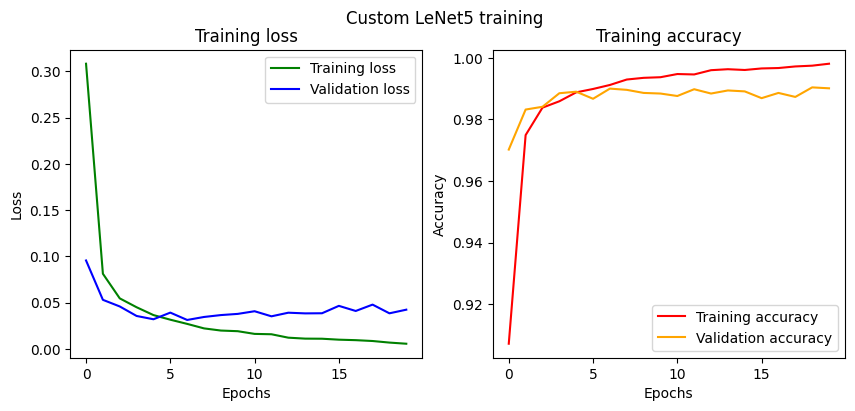

In [ ]:
plt.figure(figsize = (10,4))

plt.suptitle('Custom LeNet5 training')
plt.subplot(121)
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.epoch, history.history["accuracy"], 'r', label='Training accuracy')
plt.plot(history.epoch, history.history["val_accuracy"], 'orange', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(working_folder + "custom_LeNet.png")
plt.show()

In [ ]:
working_folder = "/content/drive/MyDrive/LeNet/"


model.save(working_folder)